# Validate and register RxRx1 metadata

In this notebook, we'll take a look at how to validate and register metadata.

We will combine metadata and deep learning embeddings into an `AnnData` object.

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import lnschema_lamin1 as ln1
import anndata as ad

💡 loaded instance: laminlabs/rxrx (lamindb 0.55.1)


In [2]:
ln.settings.verbosity = "hint"

In [3]:
ln.track()

💡 notebook imports: anndata==0.9.1 lamindb==0.55.1 lnschema_bionty==0.31.1 lnschema_lamin1==0.23.2
✅ loaded: Transform(id='Zo0qJt4IQPsbz8', name='Validate and register RxRx1 metadata', short_name='02-meta-rxrx1', version='0', type='notebook', updated_at=2023-10-06 13:28:25, latest_report_id='OwREl5WuYpHjsiu0AaEc', source_file_id='9I64U9uJpd2PnOUopzr6', created_by_id='kmvZDIX9')
✅ loaded: Run(id='YGq6vCGFAJAjLDCBg3em', run_at=2023-10-06 14:33:31, transform_id='Zo0qJt4IQPsbz8', created_by_id='kmvZDIX9', report_id='OwREl5WuYpHjsiu0AaEc')
✅   parent transform: Transform(id='VxfLdk7rOTnbz8', name='Download and register files', short_name='01-download', version='0', type='notebook', updated_at=2023-10-06 13:28:05, latest_report_id='kgSzDztANTTADNaGJvLj', source_file_id='cmE8wMYIjegF0x1Z4A7u', created_by_id='kmvZDIX9')


## Load metadata

We read in the metadata of the wells:

In [4]:
meta_file = ln.File.filter(key="rxrx1/metadata.csv").one()
meta = meta_file.load()

💡 adding file a2Y6N2V0igtDVgSMfrFu as input for run YGq6vCGFAJAjLDCBg3em, adding parent transform VxfLdk7rOTnbz8
... downloading metadata.csv: 1.00


In [5]:
meta.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710


In [6]:
meta["plate"] = meta["plate"].astype(str)
meta["site"] = meta["site"].astype(str)
meta["sirna_id"] = meta["sirna_id"].astype(str)

In [7]:
meta.shape

(125510, 11)

Add a `file_keys` column:

In [8]:
# get the 6 file keys for each row
files_list = []
for _, row in meta.iterrows():
    well = row.well
    site = row.site
    # each image has 6 channels
    files_list.append(
        f"images/{row.dataset}/{row.experiment}/Plate{row.plate}/{well}_s{site}_w1-w6.png"
    )  # channels are w1 - w6
meta["file_keys"] = files_list

In [9]:
meta.head(2)

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id,file_keys
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w1-w6.png
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s2_w1-w6.png


## Load embeddings

In [10]:
embedding_file = ln.File.filter(key="rxrx1/embeddings.csv").one()

In [11]:
embedding = embedding_file.load()
embedding.set_index("site_id", inplace=True)

💡 adding file 5Hwfp9rtzLZTPG6OxKUv as input for run YGq6vCGFAJAjLDCBg3em, adding parent transform VxfLdk7rOTnbz8
... downloading embeddings.csv: 1.00


In [12]:
embedding.shape

(125510, 128)

In [13]:
embedding.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
site_id,,,,,,,,,,,,,,,,,,,,,
U2OS-01_1_B02_1,-1.568359,-0.117188,0.912598,0.378418,-1.523438,4.394531,1.664062,1.410156,0.669434,1.088867,...,-0.135620,-2.000000,3.380859,-3.076172,-1.336914,-0.993652,-2.152344,-1.307617,4.492188,0.646973
U2OS-01_1_B02_2,-0.112671,0.162842,-0.464111,-3.265625,0.598145,0.263916,1.544922,-1.476562,1.360352,-0.535156,...,1.327148,-3.613281,0.671387,0.304688,-1.413086,0.191040,-1.658203,-0.099609,1.605469,-1.285156
U2OS-01_1_B03_1,-0.173340,1.729492,-2.585938,1.026367,1.139648,3.724609,-0.505371,3.406250,0.984375,-0.035309,...,1.701172,0.204346,-1.625000,1.002930,-2.447266,-1.492188,0.392090,-3.347656,-3.281250,-0.475342
U2OS-01_1_B03_2,-0.443604,1.350586,-5.363281,0.283203,0.530273,4.933594,1.471680,2.351562,0.550293,0.452148,...,0.972656,-2.593750,-3.115234,2.255859,-3.662109,-4.214844,2.388672,-5.515625,-3.455078,-0.545898
U2OS-01_1_B04_1,3.480469,-2.751953,2.074219,-2.109375,4.582031,0.926270,-2.501953,3.033203,-2.492188,3.822266,...,4.335938,0.744629,-0.076477,1.311523,4.371094,2.171875,2.218750,-4.050781,1.835938,-1.174805


## Validate and register metadata

### `cell_type`

We can start with curating the metadata table based on the ontologies from bionty. For example, let's start with the `cell_line` metadata.
In this table, they are called "cell_type" but they are in fact the cell line for the experiments

In [14]:
meta["cell_type"].unique()

array(['HEPG2', 'HUVEC', 'RPE', 'U2OS'], dtype=object)

In [15]:
cell_lines = lb.CellLine.from_values(meta["cell_type"])

✅ created 4 CellLine records from Bionty matching synonyms: 'HEPG2', 'HUVEC', 'RPE', 'U2OS'


In [16]:
ln.save(cell_lines, parents=False)

Set abbr:

In [4]:
lb.CellLine.filter().df()

,name,ontology_id,abbr,synonyms,description,bionty_source_id,updated_at,created_by_id
id,,,,,,,,
a3uzySL7,HUV-EC-C cell,CLO:0004307,None,HUVEC|HUV-EC-C,None,7PVI,2023-10-06 15:19:47,kmvZDIX9
9dcEG64P,U-2 OS cell,CLO:0009454,None,U2OS|U-2 OS,None,7PVI,2023-10-06 15:19:47,kmvZDIX9
KQYkiVUX,hTERT RPE-1 cell,CLO:0004290,None,hTERT RPE-1|RPE1|RPE-1|RPE,disease: pigmented epithelium; immortalized ...,7PVI,2023-10-06 15:19:47,kmvZDIX9
AkJL1qhy,Hep G2 cell,CLO:0003704,None,HEP-G2|HEPG2|Hep G2|HEP G2|HepG2,None,7PVI,2023-10-06 15:19:47,kmvZDIX9


In [5]:
lb.CellLine.filter(id="a3uzySL7").one().set_abbr("HUVEC")
lb.CellLine.filter(id="9dcEG64P").one().set_abbr("U2OS")
lb.CellLine.filter(id="KQYkiVUX").one().set_abbr("RPE")
lb.CellLine.filter(id="AkJL1qhy").one().set_abbr("HEPG2")

### `dataset` (train/test labels)

Use `ULabel` for "train", "test":

In [17]:
meta["dataset"].unique()

array(['test', 'train'], dtype=object)

In [18]:
train_test = []
for name in meta["dataset"].unique():
    train_test.append(ln.ULabel(name=name, description="ML train/test split"))

ln.save(train_test)

### `experiment`

In [19]:
ln.settings.upon_create_search_name = False

experiments = []
for name in meta["experiment"].unique():
    record = ln1.Experiment(name=name, description="RxRx1")
    experiments.append(record)

ln.save(experiments)

ln.settings.upon_create_search_name = True

### `plate`

In [20]:
is_plate = ln.ULabel(name="is_plate", description="parent of plates")
is_plate.save()

In [21]:
plates = []
for name in meta["plate"].unique():
    record = ln.ULabel(name=f"Plate{name}")
    plates.append(record)

ln.save(plates)
is_plate.children.set(plates)

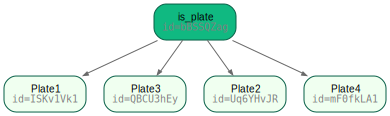

In [22]:
is_plate.view_parents(with_children=True)

### `well`

We might also want to add the well information, so that we can link image files and parse images based on well coordinates. To do this, let's first extract well locations from the table:

In [23]:
ln.settings.upon_create_search_name = False

wells = []
for well in meta["well"].unique():
    wells.append(ln1.Well(name=well, row=well[0], column=int(well[1:])))

ln.save(wells)

ln.settings.upon_create_search_name = True

### `site`

In [24]:
is_site = ln.ULabel(name="is_site", description="parent of sites")
is_site.save()

In [25]:
sites = []
for name in meta["site"].unique():
    record = ln.ULabel(name=f"Site{name}")
    sites.append(record)

ln.save(sites)
is_site.children.set(sites)

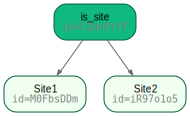

In [26]:
is_site.view_parents(with_children=True)

### `well_type`

In [27]:
is_well_type = ln.ULabel(name="is_well_type", description="parent of well types")
is_well_type.save()

In [28]:
well_types = []
for name in meta["well_type"].unique():
    record = ln.ULabel(name=name)
    well_types.append(record)

ln.save(well_types)
is_well_type.children.set(well_types)

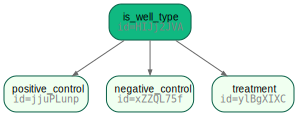

In [29]:
is_well_type.view_parents(with_children=True)

### `sirna`

add sirna to Treatment table:

In [30]:
ln.settings.upon_create_search_name = False

sirnas = []
for sirna in meta["sirna"].unique():
    record = ln1.Treatment(
        name=sirna,
        type="genetic",
        system="siRNA",
        description="ThermoFisher ID of siRNA",
    )
    sirnas.append(record)

ln.save(sirnas)

ln.settings.upon_create_search_name = True

### assay/readout

We can do the same for other ontologies that we are interested to curate. For example, the type of readout. We are going to choose the "high content screen" readout.

In [31]:
ln.Feature(name="assay", type="category").save()

In [32]:
assay = lb.ExperimentalFactor.from_bionty(name="high content screen")
assay.save(parents=False)

✅ created 1 ExperimentalFactor record from Bionty matching name: 'high content screen'


### features

In [33]:
var_features = ln.Feature.from_df(embedding)
ln.save(var_features)

In [34]:
obs_features = ln.Feature.from_df(meta)
ln.save(obs_features)

In [35]:
features = ln.Feature.lookup()

## Register metadata-file_keys as a parquet file:

Here we create a DataFrame with each row as a single image, similar to a link table but with multiple metadata columns:

In [36]:
meta_filekey = meta.copy()

In [37]:
keys_list = []
for key in meta_filekey["file_keys"]:
    keys = [key.replace("w1-w6.png", f"w{str(channel)}.png") for channel in range(1, 7)]
    keys_list.append(keys)

In [38]:
meta_filekey["file_keys"] = keys_list

In [39]:
meta_filekey = meta_filekey.explode("file_keys").reset_index(drop=True)

In [40]:
meta_filekey

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id,file_keys
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w1.png
1,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w2.png
2,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w3.png
3,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w4.png
4,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138,images/test/HEPG2-08/Plate1/B02_s1_w5.png
...,...,...,...,...,...,...,...,...,...,...,...,...
753055,U2OS-03_4_O23_2,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,2,treatment,s21454,509,images/train/U2OS-03/Plate4/O23_s2_w2.png
753056,U2OS-03_4_O23_2,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,2,treatment,s21454,509,images/train/U2OS-03/Plate4/O23_s2_w3.png
753057,U2OS-03_4_O23_2,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,2,treatment,s21454,509,images/train/U2OS-03/Plate4/O23_s2_w4.png
753058,U2OS-03_4_O23_2,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,2,treatment,s21454,509,images/train/U2OS-03/Plate4/O23_s2_w5.png


In [41]:
file_meta_filekey = ln.File.from_df(
    meta_filekey,
    field=ln.Feature.name,
    key="rxrx1/metadata.parquet",
    description="Metadata with file paths for each RxRx1 image.",
)

💡 file will be copied to default storage upon `save()` with key 'rxrx1/metadata.parquet'
✅ 12 terms (100.00%) are validated for name


In [42]:
file_meta_filekey.save()

✅ saved 1 feature set for slot: 'columns'
✅ storing file 'fW7STSOMsRwDJk6oI3Kh' at 'rxrx1/metadata.parquet'


... uploading fW7STSOMsRwDJk6oI3Kh.parquet: 1.00


In [43]:
# obs
file_meta_filekey.labels.add(cell_lines, features.cell_type)
file_meta_filekey.labels.add(train_test, features.dataset)
file_meta_filekey.labels.add(experiments, features.experiment)
file_meta_filekey.labels.add(plates, features.plate)
file_meta_filekey.labels.add(wells, features.well)
file_meta_filekey.labels.add(sites, features.site)
file_meta_filekey.labels.add(well_types, features.well_type)
file_meta_filekey.labels.add(sirnas, features.sirna)
# external
file_meta_filekey.labels.add(assay, features.assay)

✅ linked feature 'cell_type' to registry 'bionty.CellLine'
✅ linked feature 'dataset' to registry 'core.ULabel'
✅ linked feature 'experiment' to registry 'lamin1.Experiment'
✅ linked feature 'plate' to registry 'core.ULabel'
✅ linked feature 'well' to registry 'lamin1.Well'
✅ linked feature 'site' to registry 'core.ULabel'
✅ linked feature 'well_type' to registry 'core.ULabel'
✅ linked feature 'sirna' to registry 'lamin1.Treatment'
✅ linked feature 'assay' to registry 'bionty.ExperimentalFactor'
✅ linked new feature 'assay' together with new feature set FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:20:38, modality_id='RVDKV55v', created_by_id='kmvZDIX9')


## Create `AnnData` object for embeddings and metadata

In [44]:
adata = ad.AnnData(embedding)
adata.obs = meta.set_index("site_id").loc[adata.obs.index]

In [45]:
adata

AnnData object with n_obs × n_vars = 125510 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'file_keys'

## Register AnnData and link to metadata records

In [46]:
file = ln.File.from_anndata(
    adata,
    field=ln.Feature.name,
    key="rxrx1/embeddings.h5ad",
    description="Metadata annotated deep learning embeddings for each RxRx1 image.",
)

... storing 'well_id' as categorical
... storing 'cell_type' as categorical
... storing 'dataset' as categorical
... storing 'experiment' as categorical
... storing 'plate' as categorical
... storing 'well' as categorical
... storing 'site' as categorical
... storing 'well_type' as categorical
... storing 'sirna' as categorical
... storing 'sirna_id' as categorical


💡 file will be copied to default storage upon `save()` with key 'rxrx1/embeddings.h5ad'
💡 parsing feature names of X stored in slot 'var'
✅    128 terms (100.00%) are validated for name
✅    linked: FeatureSet(id='44Yqa0EBTWVZIa1B5K6A', n=128, type='number', registry='core.Feature', hash='eHBJ-ztqriazRx8KogvC', created_by_id='kmvZDIX9')
💡 parsing feature names of slot 'obs'
✅    11 terms (100.00%) are validated for name
✅    linked: FeatureSet(id='HSjOLeKZWt5g1vhfpfhT', n=11, registry='core.Feature', hash='npwB41jNAgFqyhoksJMD', modality_id='RVDKV55v', created_by_id='kmvZDIX9')


In [47]:
file.save()

✅ saved 2 feature sets for slots: 'var','obs'
✅ storing file '8P7vUWLszbjTqhEFrWxD' at 'rxrx1/embeddings.h5ad'
... uploading 8P7vUWLszbjTqhEFrWxD.h5ad: 1.00


In [48]:
# obs
file.labels.add(cell_lines, features.cell_type)
file.labels.add(train_test, features.dataset)
file.labels.add(experiments, features.experiment)
file.labels.add(plates, features.plate)
file.labels.add(wells, features.well)
file.labels.add(sites, features.site)
file.labels.add(well_types, features.well_type)
file.labels.add(sirnas, features.sirna)
# external
file.labels.add(assay, features.assay)

✅ loaded: FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:20:38, modality_id='RVDKV55v', created_by_id='kmvZDIX9')
✅ linked new feature 'assay' together with new feature set FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:21:31, modality_id='RVDKV55v', created_by_id='kmvZDIX9')


In [49]:
file.labels

Labels:
  🏷️ cell_lines (4, bionty.CellLine): 'HUV-EC-C cell', 'U-2 OS cell', 'hTERT RPE-1 cell', 'Hep G2 cell'
  🏷️ experimental_factors (1, bionty.ExperimentalFactor): 'high content screen'
  🏷️ experiments (51, lamin1.Experiment): 'RPE-06', 'RPE-10', 'U2OS-04', 'HUVEC-07', 'HEPG2-01', 'HUVEC-13', 'HUVEC-10', 'RPE-04', 'HUVEC-19', 'RPE-07', ...
  🏷️ wells (308, lamin1.Well): 'K17', 'D13', 'K02', 'M15', 'L08', 'B08', 'G18', 'J14', 'N07', 'N08', ...
  🏷️ treatments (1139, lamin1.Treatment): 's27550', 's21422', 's36691', 's19169', 's38120', 's19148', 's394', 's38627', 's555', 's21535', ...
  🏷️ ulabels (11, core.ULabel): 'test', 'Plate1', 'Site1', 'Plate3', 'Plate2', 'Site2', 'positive_control', 'Plate4', 'train', 'negative_control', ...

In [50]:
file.features

Features:
  var: FeatureSet(id='44Yqa0EBTWVZIa1B5K6A', n=128, type='number', registry='core.Feature', hash='eHBJ-ztqriazRx8KogvC', updated_at=2023-10-06 13:20:46, created_by_id='kmvZDIX9')
    feature_109 (number)
    feature_2 (number)
    feature_107 (number)
    feature_31 (number)
    feature_34 (number)
    feature_33 (number)
    feature_1 (number)
    feature_12 (number)
    feature_116 (number)
    feature_39 (number)
    feature_11 (number)
    feature_6 (number)
    feature_73 (number)
    feature_4 (number)
    feature_60 (number)
    feature_89 (number)
    feature_120 (number)
    feature_97 (number)
    feature_9 (number)
    feature_67 (number)
    feature_106 (number)
    feature_101 (number)
    feature_78 (number)
    feature_13 (number)
    feature_42 (number)
    feature_3 (number)
    feature_40 (number)
    feature_29 (number)
    feature_92 (number)
    feature_27 (number)
    feature_119 (number)
    feature_63 (number)
    feature_59 (number)
    feature_7 (num

In [51]:
file.feature_sets.df()

,name,n,type,modality_id,registry,hash,updated_at,created_by_id
id,,,,,,,,
44Yqa0EBTWVZIa1B5K6A,None,128,number,None,core.Feature,eHBJ-ztqriazRx8KogvC,2023-10-06 15:20:46,kmvZDIX9
HSjOLeKZWt5g1vhfpfhT,None,11,None,RVDKV55v,core.Feature,npwB41jNAgFqyhoksJMD,2023-10-06 15:20:47,kmvZDIX9
aXI3KfYXZMrKTAT1P4ew,None,1,None,RVDKV55v,core.Feature,TB1OiIa_qLLfly0M__wL,2023-10-06 15:21:31,kmvZDIX9


In [52]:
file.features["obs"].df()

,name,type,modality_id,unit,description,registries,synonyms,updated_at,created_by_id
id,,,,,,,,,
WJVtaOGmyz4Q,well,category,None,None,None,lamin1.Well,None,2023-10-06 15:20:47,kmvZDIX9
znBDUGV8D8pj,sirna_id,category,None,None,None,None,None,2023-10-06 15:20:47,kmvZDIX9
picYDUCOPADA,cell_type,category,None,None,None,bionty.CellLine,None,2023-10-06 15:20:47,kmvZDIX9
01Brms15XJGR,well_id,category,None,None,None,None,None,2023-10-06 15:20:47,kmvZDIX9
Q3qKj5zEFi3r,plate,category,None,None,None,core.ULabel,None,2023-10-06 15:20:47,kmvZDIX9
igEfrbTHauIa,sirna,category,None,None,None,lamin1.Treatment,None,2023-10-06 15:20:47,kmvZDIX9
LddCMDxZYYVS,file_keys,object,None,None,None,None,None,2023-10-06 15:20:47,kmvZDIX9
hfOQ6bO0KrGd,site,category,None,None,None,core.ULabel,None,2023-10-06 15:20:47,kmvZDIX9
M7XiOFNeHbjT,dataset,category,None,None,None,core.ULabel,None,2023-10-06 15:20:47,kmvZDIX9


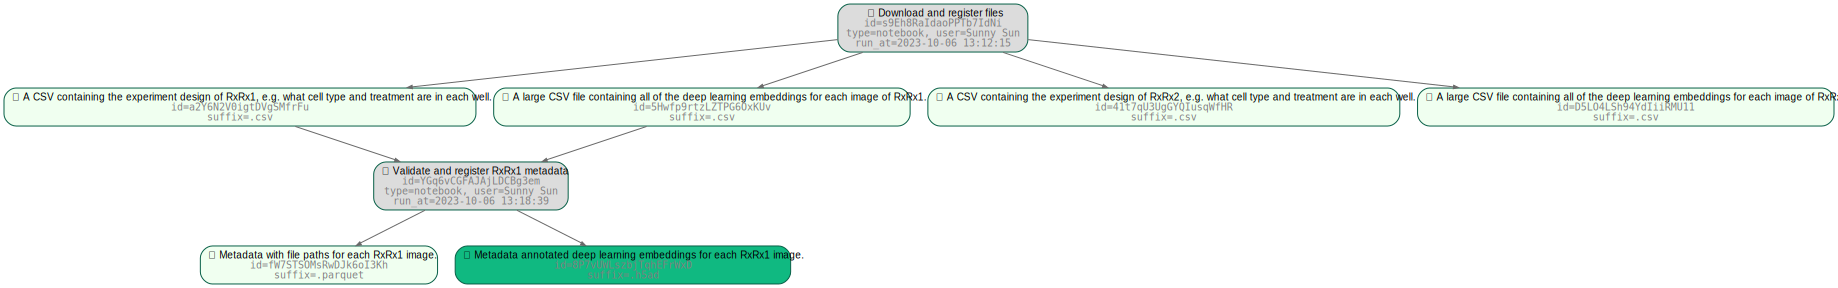

In [53]:
file.view_flow()